# Ensemble Methods for Regression

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.in2p3.fr%2Fenergy4climate%2Fpublic%2Feducation%2Fmachine_learning_for_climate_and_energy/master?filepath=book%2Fnotebooks%2F08_ensemble_methods.ipynb)

<div class="alert alert-block alert-warning">
    <b>Prerequisites</b>
    
- Apply ordinary least squares;
- Apply bias-variance decomposition to understand the overfit-underfit tradeoff;
- Select regularization hyper-parameters with cross-validation;
- Test model prediction skills.
</div>

<div class="alert alert-block alert-info">
    <b>Learning Outcomes</b>

- Combining several models together;
- Understand the principles behind bootstrapping and boosting;
- Get intuitions with specific models such as random forest and gradient boosting;
- Identify the important hyperparameters of random forest and gradient boosting decision trees as well as their typical values.
</div>

Ensemble methods:
- Bagging;
- Random forest;
- Voting / Stacking;
- Bayesian methods for non-parametric regression;
- Boosting.

## Intuitions on tree-based methods

- Tree-based methods partition the feature space into a set of rectangles, and then fit a simple model (like a constant) in each one.
- The optimal partition is usually approximated by a greedy (iterative) algorithm. 
- Tree depth is a tuning parameter governing the model's complexity, and the optimal tree size should be adaptively chosen from the data.

See [Scikit-learn course - Intuitions on tree-based methods](https://inria.github.io/scikit-learn-mooc/trees/slides.html).

## Intuition on ensemble of tree-based methods

See [Scikit-learn course - Intuitions on ensemble of tree-based models](https://inria.github.io/scikit-learn-mooc/ensemble/slides.html#intuitions-on-ensemble-of-tree-based-models).

### The two tasks of ensemble learning

1. Develop a population of base learners from the training data;
2. Combine them to form a composite predictor.

## Ensemble methods based on bootstrapping

- With cross-validation and boostrapping (shuffled version), we have resampled the training data to assess the accuracy of a prediction or a parameter estimate.
- *Bagging* (Bootstrap AGGregatING) is the use of bootstrapping to improve the estimate or prediction itself.
- *Random forests* improve on bagged trees by reducing the correlation between sampled trees.

### Bagging method

Given training data $\mathbf{Z} = \{(x_1, y_1), \ldots, (x_N, y_N)\}$,

- Get $B$ boostrap samples $\mathbf{Z}^{*b}, b = 1, \ldots, B$;
- Fit a model $\hat{f}^{*b}$ to each bootstrap sample;
- Given a new input $x$, generate predictions $\hat{f}^{*b}(x)$ from each model;
- Average the predictions to get the bagging prediction:

\begin{equation}
\hat{f}_\mathrm{bag}(x) = \frac{1}{B} \sum_{b = 1}^B \hat{f}^{*b}(x).
\end{equation}

### Why bagging?

<div class="alert alert-block alert-info">
   Bagging reduces variance and leaves bias unchanged.
</div>

- The base estimator $\hat{f}$ is too complex and overfits;
- Each bootstrap estimate $\hat{f}^{*b}$ also overfits;
- But averaging them reduces their there variance and thus their tendency to overfit.

### Bagging usage

- For regression / classification;
- The base estimator can be any model;
- But it works especially well for high-variance, low-bias base estimator such as trees;
- The number of models $B$ is a hyperparameter controlling the regularization;
- Drawback: A bagged tree is no longer a tree which limits interpretation.

### Bagging example

#### Generating a synthetic dataset for the sake of the example

First, we will generate a simple synthetic dataset to get insights regarding bootstraping.

In [1]:
# Numerical analysis modules
import numpy as np
import pandas as pd

# Default number of training samples
N = 30
    
# Default noise standard deviation
sigma = 4.

# Initialize random number generator
rng = np.random.RandomState(1)

# Plot configuration
xlabel = 'Input'
ylabel = 'Target'
xlim = 3.5 * np.array([-1, 1])

def f(x):
    noise = sigma * rng.randn(len(x))
    y = x**3 - 0.5 * (x+1)**2 + noise
    y /= y.std()
    
    return y

def generate_data(n_samples=N):
    """Generate synthetic dataset. Returns `data_train`, `data_test`,
    `target_train`."""
    x_min, x_max = xlim * 3 / 3.5
    
    # Generate train data
    x_train = rng.uniform(x_min, x_max, size=n_samples)
    y_train = f(x_train)
    input_train = pd.Series(x_train, name=xlabel)
    target_train = pd.DataFrame(y_train, index=x_train, columns=[ylabel])
    target_train.index.name = input_train.name
    
    # Generate test data
    x_test = np.linspace(*xlim, num=300)
    y_test = f(x_test)
    input_test = pd.Series(x_test, name=xlabel)
    target_test = pd.DataFrame(y_test, index=x_test, columns=[ylabel])
    target_test.index.name = input_test.name

    return input_train, input_test, target_train, target_test

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
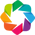

:Scatter   [Input]   (Target)

In [2]:
# Plot modules
import matplotlib.pyplot as plt
import holoviews as hv
hv.extension('bokeh')
import hvplot.pandas
import panel as pn

# Generate training set
input_train, input_test, target_train, target_test = generate_data(
    n_samples=N)

# Plot training set
ylim = xlim
kwargs_plot_train = dict(size=40, xlim=xlim, ylim=ylim)
target_train.hvplot.scatter(title='Synthetic training dataset', width=600,
                            **kwargs_plot_train)

#### Individual predictions

The relationship between target and the input is nonlinear.

Let us first see how an individual OLS and an individual decision tree perform.

In [3]:
# Machine-learning modules
from sklearn import linear_model, tree, preprocessing, pipeline, metrics

# Make these estimators available
linear_reg = linear_model.LinearRegression()
spline_reg = pipeline.make_pipeline(
    preprocessing.SplineTransformer(n_knots=4, degree=1), linear_reg)
tree_reg = tree.DecisionTreeRegressor(max_depth=3, random_state=0)
base_estimators = [linear_reg, tree_reg, spline_reg]

def get_individual_prediction(base_estimator):
    # Fit estimator
    X_train = input_train.values[:, None]
    y_train = target_train[ylabel].values
    base_estimator.fit(X_train, y_train)
    
    # Get prediction from test input
    X_test = input_test.values[:, None]
    y_pred = base_estimator.predict(X_test)
    
    # Get test score
    y_test = target_test[ylabel].values
    score_test = base_estimator.score(X_test, y_test)
    
    return y_pred, score_test   
    
def plot_individual_prediction(base_estimator):
    y_pred, score_test = get_individual_prediction(base_estimator)
    
    target_pred = pd.DataFrame(y_pred, index=input_test, columns=[ylabel])
    
    # Plot
    p = target_train.hvplot.scatter(label='Training set', **kwargs_plot_train)
    title = 'R2 = {:.2f}'.format(score_test)
    p *= target_pred.hvplot(line_width=3, label='Simple prediction',
                            title=title)
        
    return p

select_base_estimator = pn.widgets.Select(
    name='Base estimator', options=base_estimators, width=750)

In [4]:
pn.interact(plot_individual_prediction, base_estimator=select_base_estimator)

Column
    [0] Column
        [0] Select(name='Base estimator', options=[LinearRegression(), ...], value=LinearRegression(), width=750)
    [1] Row
        [0] HoloViews(Overlay, name='interactive00858')

#### Generating bootstrap samples

- Randomly draw $N$ points from $\mathbf{Z}$ with replacement. To do so:
  - Use a random number generator to draw $N$ integers from $1$ to $N$. The same integer may be drawn multiple times (replacement);
  - Take these integers as indices to select input-output pairs in $\mathbf{Z}$;
- Repeat $B$ times to get $B$ samples $\mathbf{Z}^{*b}$, each containing $N$ points.

Thus, the bootstrap sample will contain some data points several times while some of the original data points will not be present.

However, a smaller number points may be drawn with or without replacement.

This is illustrated below, where the number of points per boostrap sample is `max_samples` and where `replace` controls whether points are replaced or not. 

In [5]:
def get_bootstrap_sample(max_samples=N, replace=True):
    # Get random indices
    bootstrap_indices = rng.choice(N, size=max_samples, replace=replace)
    
    # Generate boostrap sample
    input_b = input_train.iloc[bootstrap_indices]
    target_b = target_train.iloc[bootstrap_indices]
    
    # Get fraction of unique samples
    fraction = len(np.unique(bootstrap_indices)) / N
    
    return input_b, target_b, fraction

def plot_bootstrap_sample(b, max_samples=N, replace=True):
    input_b, target_b, fraction = get_bootstrap_sample(max_samples, replace)

    # Plot with hvplot
    p = target_train.hvplot.scatter(label='Training set', **kwargs_plot_train)
    title = 'Percentage of unique samples: {}%'.format(int(fraction * 100))
    p *= target_b.hvplot.scatter(
        label='Bootstrap sample', title=title,
        size=140, alpha=0.5, marker='circle', fill_color=None, line_width=4)
    
    return p
    
button = pn.widgets.Button(name='Resample bootstrap', button_type='primary')

In [6]:
pn.interact(plot_bootstrap_sample, b=button, max_samples=np.arange(N) + 1)

Column
    [0] Column
        [0] Button(button_type='primary', name='Resample bootstrap')
        [1] DiscreteSlider(formatter='%d', name='max_samples', options=[1, 2, 3, 4, 5, ...], value=30)
        [2] Checkbox(name='replace', value=True)
    [1] Row
        [0] HoloViews(Overlay, name='interactive01022')

- Observe that the variations all share common points with the original dataset.
- The percentage of different training points found in the bootstrap sample is given in the title.
- Some of the points are randomly resampled several times and appear as darker orange circles.

#### Bootstrapping predictions

- Now, we can fit an estimator for each of these datasets and they all shall be slightly different as well.
- We can use each of the estimator to predict on the testing data.
- They shall give slightly different predictions.

In [7]:
# Default number of estimators
N_ESTIMATORS = 5

def get_bootstrap_predictions(
    base_estimator, n_estimators, max_samples, replace):
    # Get bootstrap predictions
    X_test = input_test.values[:, None]
    y_preds = np.empty((n_estimators, X_test.shape[0]))
    for b in range(n_estimators):
        input_b, target_b, _ = get_bootstrap_sample(max_samples, replace)
        X_b = input_b.values[:, None]
        y_b = target_b[ylabel].values
        base_estimator.fit(X_b, y_b)
        y_preds[b] = base_estimator.predict(X_test)
        
    return y_preds

def plot_bootstrap_predictions(b, base_estimator=linear_reg,
                               n_estimators=N_ESTIMATORS):
    y_preds = get_bootstrap_predictions(base_estimator, n_estimators, N, True)
    
    p = target_train.hvplot.scatter(label='Training set', **kwargs_plot_train)
    for b in range(n_estimators):
        target_pred_b = pd.DataFrame(
            y_preds[b], index=input_test, columns=[ylabel])
        label = 'Bootstrap prediction {}'.format(b)
        p *= target_pred_b.hvplot(line_dash='dashed', label=label)
        
    return p

button_multi = pn.widgets.Button(
    name='Resample all bootstraps', button_type='primary')

In [8]:
pn.interact(plot_bootstrap_predictions, b=button_multi,
            base_estimator=select_base_estimator,
            n_estimators=np.arange(N * 2) + 1)

Column
    [0] Column
        [0] Button(button_type='primary', name='Resample all bootstraps')
        [1] Select(name='Base estimator', options=[LinearRegression(), ...], value=LinearRegression(), width=750)
        [2] DiscreteSlider(formatter='%d', name='n_estimators', options=[1, 2, 3, 4, 5, ...], value=5)
    [1] Row
        [0] HoloViews(Overlay, name='interactive01194')

#### Aggregating

- Once our $B$ estimators are fitted and we are able to get $B$ predictions, one for each.
- In regression, the most straightforward way to combine those predictions is just to average them.

We can plot the averaged predictions from the previous example.

In [9]:
def plot_bagging(b, base_estimator=linear_reg, n_estimators=N_ESTIMATORS,
                 plot_bootstrap_predictions=True):
    y_preds = get_bootstrap_predictions(base_estimator, n_estimators, N, True)
    
    # Get bagged prediction
    y_pred_bag = y_preds.mean(0)
    target_pred_bag = pd.DataFrame(
        y_pred_bag, index=input_test, columns=[ylabel])
    
    # Get test score
    y_test = target_test[ylabel].values
    score_test = metrics.r2_score(y_test, y_pred_bag)
    
    p = target_train.hvplot.scatter(label='Training set', **kwargs_plot_train)
    title = 'R2(bagging) = {:.2f}'.format(score_test)
    p *= target_pred_bag.hvplot(line_width=3, label='Bagging prediction',
                                title=title)
    
    # Add bootstrap predictions
    if plot_bootstrap_predictions:
        for b in range(n_estimators):
            target_pred_b = pd.DataFrame(
                y_preds[b], index=input_test, columns=[ylabel])
            label = 'Bootstrap prediction {}'.format(b)
            p *= target_pred_b.hvplot(line_dash='dashed', label=label)
        
    return p

In [10]:
pn.interact(plot_bagging, b=button_multi,
            base_estimator=select_base_estimator,
            n_estimators=np.arange(N * 2) + 1)

Column
    [0] Column
        [0] Button(button_type='primary', name='Resample all bootstraps')
        [1] Select(name='Base estimator', options=[LinearRegression(), ...], value=LinearRegression(), width=750)
        [2] DiscreteSlider(formatter='%d', name='n_estimators', options=[1, 2, 3, 4, 5, ...], value=5)
        [3] Checkbox(name='plot_bootstrap_prediction..., value=True)
    [1] Row
        [0] HoloViews(Overlay, name='interactive01653')

- The blue line shows the averaged predictions, which would be the final predictions given by our "bag" of regressors.
- Note that the predictions of the ensemble is more stable because of the averaging operation.
- As a result, the bag of estimators as a whole is less likely to overfit than the individual trees.

#### Boostrap estimates

As with cross-validation, we can directly plot the distribution of parameter estimates from the bootstrap estimators to evaluate the variability of the estimates.

In [11]:
# Boostrap configuration with spline base estimators
base_estimator = spline_reg
n_estimators = N_ESTIMATORS
max_samples = N
replace = True

# Get bootstrap estimates
X_test = input_test.values[:, None]
coefs = []
b = 0
while b < n_estimators:
    input_b, target_b, _ = get_bootstrap_sample(max_samples, replace)
    X_b = input_b.values[:, None]
    y_b = target_b[ylabel].values
    base_estimator.fit(X_b, y_b)
    coef = base_estimator[1].coef_
    if (np.abs(coef) < 1.e10).all():
        coefs.append(coef.copy())
        b += 1

df_coefs = pd.DataFrame(coefs)
df_coefs.index.name = 'Spline'
df_coefs.index.name = 'Coefficients'

In [12]:
df_coefs.hvplot.box(invert=True, xlabel='Spline', ylabel='Coefficient',
                    title='Coefficient importance and variability')

:BoxWhisker   [Variable]   (value)

### Bootstrapping features (any base estimator)

Input features can also be bootstrapped to reduce the correlation between boostrapped estimators and further decrease the variance of the estimator (often at the cost of a small increase in bias).

### Introduction to random forests (restricted to trees)

- As with bagging, the prediction of the ensemble is also given as the averaged prediction of the individual classifiers;
- Both samples and features are bootstrapped;
- However, the bootstrapping of features occurs at each split of a decision tree, i.e:
  - Select, before each split, $m < p$ of the input features at random as candidates for splitting;
- Lower variance and improve predictions by increasing the number of trees, but at the cost of fitting and prediction time.

#### Advantages of random forests

- Further reduce the variance compared to bagging;
- On many problems the performance of random forests is very similar to boosting, and they are simpler to train and tune;
- Often do remarkably well with very little tuning required making it a good off-the-shelf method.

## Model averaging and stacking (committee-based approaches)

Aggregating different models with:
- An average (uniform weights);
- Weights proportional to the posterior probability of each model (Bayesian model);
- Optimal weights (stacking).

### Goal of aggregation

- An alternative way to regularize: aggregating weak estimators;
- Increase the number of weakly correlated estimators to lower the variance; 
- Avoid having to find the model that best performs on a given dataset;
- Sometimes outperform the prediction performance of each individual model.

### Voting

- In bagging, the estimates vary but the definition of the base model is unchanged;
- Instead, one can average different models (e.g. a Ridge, a decision tree and a neural network);
- But why should the model be uniformly weighted when a Bayesian model predicts different weights?

### Stacked generalization (Stacking)

**Method:**
- Make predictions from each individual estimator;
- Stack them together as a new input matrix;
- Train a final estimator with this matrix as input using cross-validation:
  - e.g. with leave-one out CV, minimize the average error between the target $i$ and the final prediction from the individual predictions from input $i$ by base estimators trained on the dataset with the input $i$ removed.

**Advantage:**
- Stacking provide an alternative by combining the outputs of several learners, without the need to choose a model specifically;
- The performance of stacking is usually close to the best model;
- It sometimes it can outperform the prediction performance of each individual model.

**Drawback:**
- Computationally expensive;
- Less interpretable than individual predictions.

## Ensemble based on boosting

- Seems similar to bagging/voting: combines the predictions of many "weak" classifiers to produce a powerful "committee";
- Yet very different: models are sequentially trained on inputs with evolving weights;
- As a consequence, boosting can reduce the bias when bagging only reduce the variance.

See [Scikit-learn course - Ensemble boosting](https://inria.github.io/scikit-learn-mooc/ensemble/ensemble_boosting_index.html#ensemble-based-on-boosting).

## To go further

- [Bootstrapping features with Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html);
- [Feature importances in Scikit-learn course](https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html#randomforest-feature-importances);
- Bayesian models (Bishop 2006);
- Relationship between bootstrap, maximum likelihood and Bayesian methods (Chap. 8 in Hastie *et al.* 2009);
- More on boosting methods and analytical results (Chap. 10 in Hastie *et al.* 2009);
- Versions of ensemble methods for classification (Hastie *et al.* 2009).

## References

- Chap. 8-10, 15 and 16 in [Hastie, T., Tibshirani, R., Friedman, J., 2009. *The Elements of Statistical Learning*, 2nd ed. Springer, New York.](https://doi.org/10.1007/978-0-387-84858-7)
- [Bishop, C., 2006. Pattern Recognition and Machine Learning, Information Science and Statistics. Springer-Verlag, New York.](https://www.cs.uoi.gr/~arly/courses/ml/tmp/Bishop_book.pdf)
- [Du, P., 2019. Ensemble Machine Learning-Based Wind Forecasting to Combine NWP Output With Data From Weather Station. *IEEE Transactions on Sustainable Energy* 10, 2133-2141.](https://doi.org/10/gnbgvj)

***
## Credit

[//]: # "This notebook is part of [E4C Interdisciplinary Center - Education](https://gitlab.in2p3.fr/energy4climate/public/education)."
Contributors include Bruno Deremble and Alexis Tantet.
Several slides and images are taken from the very good [Scikit-learn course](https://inria.github.io/scikit-learn-mooc/).

<br>

<div style="display: flex; height: 70px">
    
<img alt="Logo LMD" src="images/logos/logo_lmd.jpg" style="display: inline-block"/>

<img alt="Logo IPSL" src="images/logos/logo_ipsl.png" style="display: inline-block"/>

<img alt="Logo E4C" src="images/logos/logo_e4c_final.png" style="display: inline-block"/>

<img alt="Logo EP" src="images/logos/logo_ep.png" style="display: inline-block"/>

<img alt="Logo SU" src="images/logos/logo_su.png" style="display: inline-block"/>

<img alt="Logo ENS" src="images/logos/logo_ens.jpg" style="display: inline-block"/>

<img alt="Logo CNRS" src="images/logos/logo_cnrs.png" style="display: inline-block"/>
    
</div>

<hr>

<div style="display: flex">
    <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0; margin-right: 10px" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
    <br>This work is licensed under a &nbsp; <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.
</div>